# read the data

In [42]:
import pandas as pd 
df = pd.read_csv("adult.csv").drop('Unnamed: 0',axis=1)

In [43]:
len(df)

32561

# explore the data

In [44]:
df.target.value_counts()

<=50K    24720
>50K      7841
Name: target, dtype: int64

In [45]:
df.target.value_counts()/len(df)

<=50K    0.75919
>50K     0.24081
Name: target, dtype: float64

In [46]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [47]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,189778.366512,10.080679,1077.648844,87.303830,40.437456
std,13.640433,105549.977697,2.572720,7385.292085,402.960219,12.347429
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117827.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178356.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,237051.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,1484705.000000,16.000000,99999.000000,4356.000000,99.000000


In [48]:
numerical_columns = df.describe().columns

def describe_categorical_values(df, non_interesting_columns=[], num_categories=5):
    values_df = pd.DataFrame()
    for i, column in enumerate(df.columns):
        if column in non_interesting_columns:
            continue
        top_values0 = ["{}: {}%".format(x,int(round(100*y/len(df))))
                       for x, y in zip(df[column].value_counts(dropna=False).head(num_categories).index,
                                       df[column].value_counts(dropna=False).head(num_categories).values)]
        if len(top_values0) < num_categories:
            top_values = [None]*num_categories
            top_values[:len(top_values0)] = top_values0
        else:
            top_values = top_values0
        values_df[column] = top_values
    return values_df.transpose()

describe_categorical_values(df, non_interesting_columns=numerical_columns, num_categories=6)

,0,1,2,3,4,5
workclass,Private: 70%,Self-emp-not-inc: 8%,Local-gov: 6%,?: 6%,State-gov: 4%,Self-emp-inc: 3%
education,HS-grad: 32%,Some-college: 22%,Bachelors: 16%,Masters: 5%,Assoc-voc: 4%,11th: 4%
marital-status,Married-civ-spouse: 46%,Never-married: 33%,Divorced: 14%,Separated: 3%,Widowed: 3%,Married-spouse-absent: 1%
occupation,Prof-specialty: 13%,Craft-repair: 13%,Exec-managerial: 12%,Adm-clerical: 12%,Sales: 11%,Other-service: 10%
relationship,Husband: 41%,Not-in-family: 26%,Own-child: 16%,Unmarried: 11%,Wife: 5%,Other-relative: 3%
race,White: 85%,Black: 10%,Asian-Pac-Islander: 3%,Amer-Indian-Eskimo: 1%,Other: 1%,None
sex,Male: 67%,Female: 33%,None,None,None,None
native-country,United-States: 90%,Mexico: 2%,?: 2%,Philippines: 1%,Germany: 0%,Canada: 0%
target,<=50K: 76%,>50K: 24%,None,None,None,None


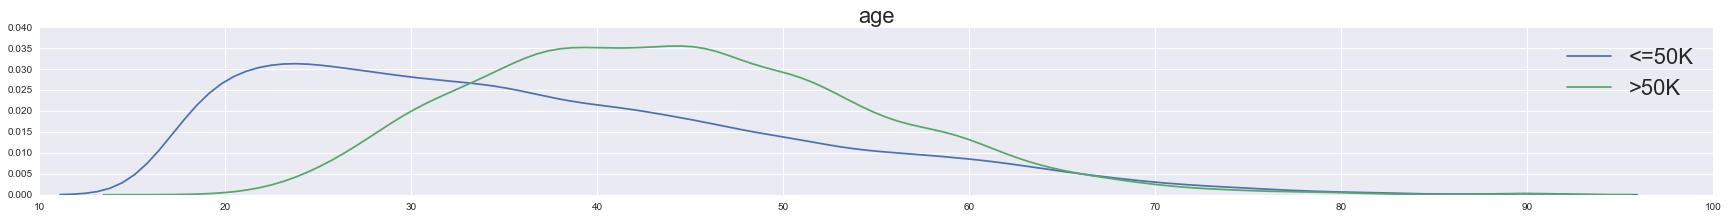

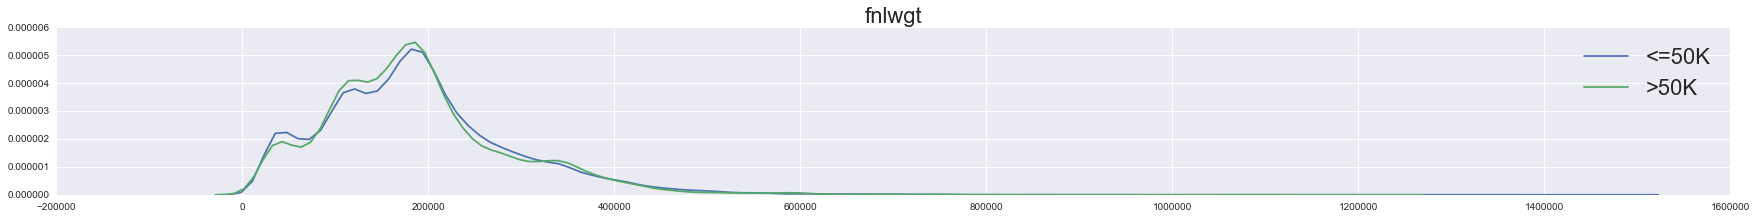

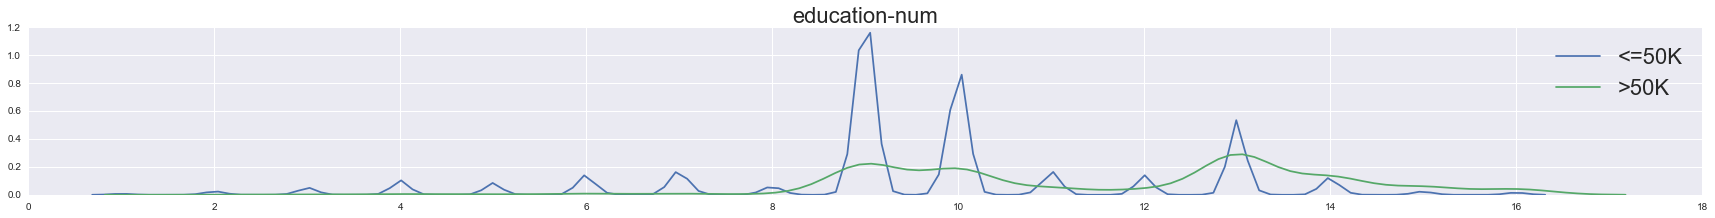

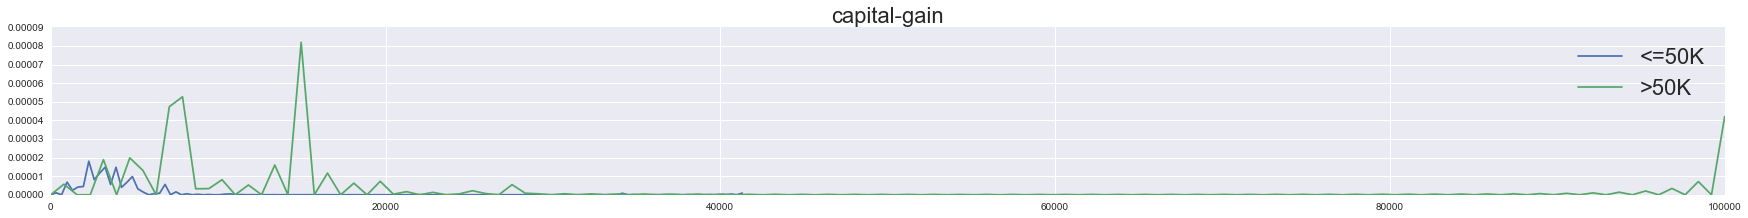

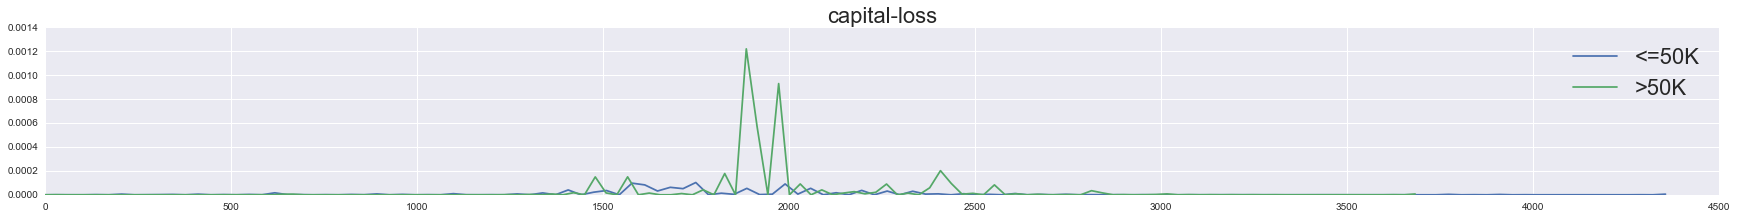

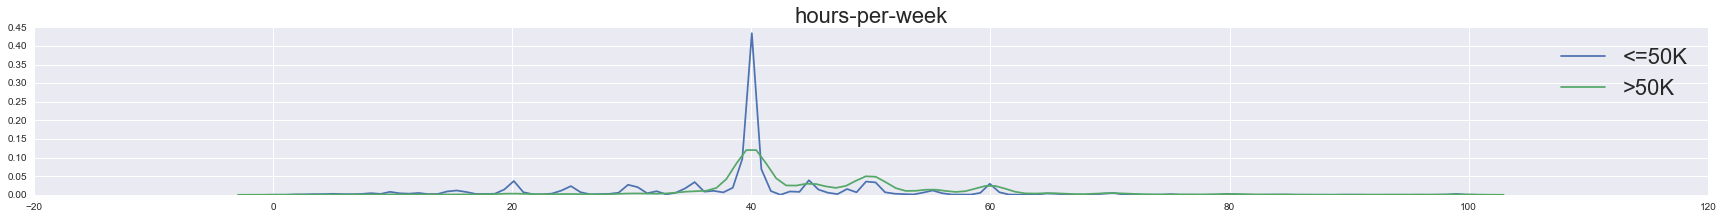

In [49]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
for col in numerical_columns:
    plt.figure(figsize=(30,3))
    sns.kdeplot(df.loc[df.target=='<=50K',col], label='<=50K')
    sns.kdeplot(df.loc[df.target=='>50K',col], label='>50K')
    plt.legend(fontsize=22)
    plt.title(col, fontsize=22);

# bubble plot

In [50]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


def get_point(x, digits=2):
    a, b = x.split(',')
    a = float(a.strip("("))
    b = float(b.strip("]"))
    c = (a+b)/2
    return np.round(c,digits)


def bubble_plot(df, x, y, z_boolean=None, ordered_x_values=None, ordered_y_values=None, bins_x=10,
                bins_y=10, fontsize=16, figsize=(10,5), maximal_bubble_size=4000,
                normalization_by_all = False, log=False):
    """
    :param df: dataframe
    :param x:  name of first numerical/categorical field (string) (for x-axis)
    :param y: name of second numerical/categorical field (string) (for y-axis)
    :param z_boolean: name of categorical field with two categories / boolean field (for coloring)
    :param ordered_x_values: the values we would like to map from x categorical variable 
    according to the order we would like to present them
    :param ordered_y_values: the values we would like to map from the y categorical variable 
    according to the order we would like to present them
    :param bins_x: the bins for x values if x is numberic
    :param bins_y: the bins for y values if y is numberic
    :param normalization_by_all: True - shows joint distribution p(x,y), False - shows conditional distribution p(y|x)
    :param maximal_bubble_size: if the bubbles are too big or too small this is the parameter you should change!
    :param log: whether to apply log on the count (influence the size of the bubbles)
    :return: nice bubble plot, bubble size is propotional to the frequency of the bucket :)
    """
    plt.figure(figsize=figsize)
    x_is_numeric = df[x].dtype in (float, int) and ordered_x_values is None
    y_is_numeric = df[y].dtype in (float, int) and ordered_y_values is None 
    count_table = pd.concat([pd.cut(df[x], bins=bins_x) if x_is_numeric else df[x],
                             pd.cut(df[y], bins=bins_y) if y_is_numeric else df[y]], axis=1)
    count_table = count_table.groupby(x)[y].value_counts().unstack().fillna(0)
    ordered_x_values = count_table.index.values if ordered_x_values is None else ordered_x_values
    ordered_y_values = count_table.columns if ordered_y_values is None else ordered_y_values
    if z_boolean is not None:
        count_table_long, xticks, yticks, xticklabels, yticklabels = plot_with_z(df, x, y, z_boolean, bins_x, bins_y, x_is_numeric, y_is_numeric, ordered_x_values, ordered_y_values, maximal_bubble_size, 
                                                                                 normalization_by_all=normalization_by_all)
    else:
        count_table_long, xticks, yticks, xticklabels, yticklabels = plot_without_z(df, x, y, z_boolean, count_table, bins_x, bins_y, x_is_numeric, y_is_numeric, ordered_x_values, ordered_y_values, 
                                                                                    normalization_by_all=normalization_by_all, log=log, maximal_bubble_size=maximal_bubble_size )
    plt.xticks(xticks, xticklabels,fontsize=fontsize)
    plt.yticks(yticks, yticklabels,fontsize=fontsize)
    plt.xlabel(x, fontsize=fontsize)
    plt.ylabel(y, fontsize=fontsize)
    if z_boolean is None:
        plt.title("{} vs {} ".format(y,x),fontsize=fontsize+4);
    else:
        plt.title("{} vs {} and {} (in colors)".format(y,x, z_boolean),fontsize=fontsize+4);

def plot_without_z(df, x, y, z, count_table, bins_x, bins_y, x_is_numeric, y_is_numeric, ordered_x_values, ordered_y_values, normalization_by_all=False, log=False, maximal_bubble_size=4000):
    if normalization_by_all:
        count_table /= count_table.sum().sum()
    else:
        count_table = count_table.transpose()
        for col in count_table.columns:
            count_table[col] /= count_table[col].sum()
        count_table = count_table.transpose()
    if log:
        count_table = np.log(count_table)
        maximal_bubble_size /= 2
    size_factor = maximal_bubble_size/count_table.max().max()
    count_table_long = pd.melt(count_table.reset_index(), id_vars=x)
    x_values_dict = {x:i for i, x in enumerate(ordered_x_values)} \
        if not x_is_numeric else {xx:get_point(xx) for xx in ordered_x_values}
    y_values_dict = {x:i for i, x in enumerate(ordered_y_values)} \
        if not y_is_numeric else {xx: get_point(xx) for xx in ordered_y_values}
    xticks = np.arange(count_table.shape[0]) if not x_is_numeric else [get_point(xx) for xx in ordered_x_values]
    yticks = np.arange(count_table.shape[1]) if not y_is_numeric else [get_point(xx) for xx in ordered_y_values]
    xticklabels = ordered_x_values if not x_is_numeric else [get_point(xx) for xx in ordered_x_values]
    yticklabels = ordered_y_values if not y_is_numeric else [get_point(xx) for xx in ordered_y_values]
    count_table_long[x] = count_table_long[x].map(x_values_dict)
    count_table_long[y] = count_table_long[y].map(y_values_dict) 
    plt.scatter(count_table_long[x], count_table_long[y], s=size_factor*count_table_long['value'],
                c=count_table_long['value'], cmap='cool')
 
    return count_table_long, xticks, yticks, xticklabels, yticklabels
    
def plot_with_z(df, x, y, z_boolean, bins_x, bins_y, x_is_numeric, y_is_numeric, ordered_x_values, ordered_y_values, maximal_bubble_size=4000, normalization_by_all=False):
    count_table = pd.concat([pd.cut(df[x], bins=bins_x) if x_is_numeric else df[x],
                         pd.cut(df[y], bins=bins_y) if y_is_numeric else df[y], df[z_boolean]], axis=1)
    count_table = count_table.groupby([x,z_boolean])[y].value_counts().unstack().fillna(0)
    count_table = count_table.unstack()
    count_table_long = pd.melt(count_table.reset_index(), id_vars=x)
    z_boolean_values = count_table_long[z_boolean].unique()
    ratio = pd.DataFrame({'ratio':count_table_long.set_index([x,y,z_boolean]).unstack()['value'][z_boolean_values[1]] / (
    count_table_long.set_index([x,y,z_boolean]).unstack()['value'].sum(axis=1) )})
    count_table_long = count_table_long.set_index([x, y ])[['value']].merge(ratio, left_index=True, right_index=True).reset_index()
    size_factor = maximal_bubble_size/count_table_long['value'].max()
    x_values_dict = {x:i for i, x in enumerate(ordered_x_values)} \
        if not x_is_numeric else {xx:get_point(xx) for xx in ordered_x_values}
    y_values_dict = {x:i for i, x in enumerate(ordered_y_values)} \
        if not y_is_numeric else {xx: get_point(xx) for xx in ordered_y_values}
    xticks = np.arange(len(ordered_x_values)) if not x_is_numeric else [get_point(xx) for xx in ordered_x_values]
    yticks = np.arange(len(ordered_y_values)) if not y_is_numeric else [get_point(xx) for xx in ordered_y_values]
    xticklabels = ordered_x_values if not x_is_numeric else [get_point(xx) for xx in ordered_x_values]
    yticklabels = ordered_y_values if not y_is_numeric else [get_point(xx) for xx in ordered_y_values]
    count_table_long[x] = count_table_long[x].map(x_values_dict)
    count_table_long[y] = count_table_long[y].map(y_values_dict)
    plt.scatter(count_table_long[x], count_table_long[y], s=size_factor*count_table_long['value'],
                c=count_table_long['ratio'],  alpha=0.5,
                cmap='cool')
    return count_table_long, xticks, yticks, xticklabels, yticklabels


# Look at one variable vs. the target

/Users/shirmeir/.virtualenvs/risk3/lib/python3.4/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1
/Users/shirmeir/.virtualenvs/risk3/lib/python3.4/site-packages/pandas/core/internals.py:1031: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._try_coerce_result(func(values, other))


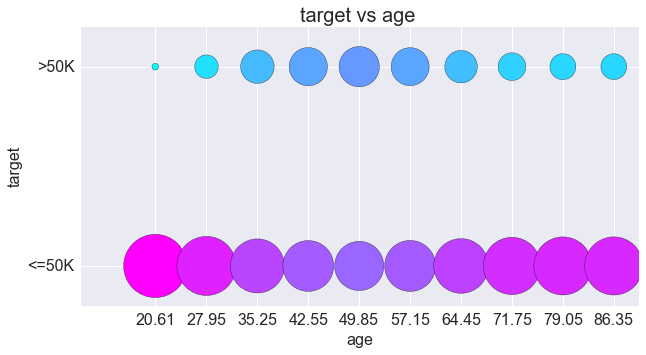

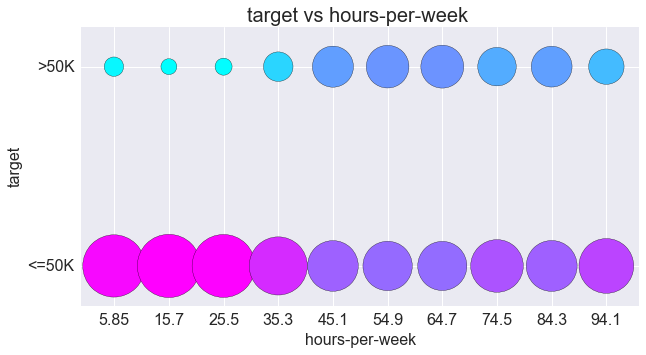

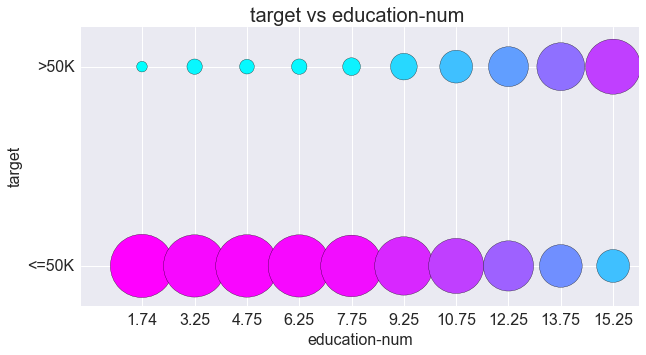

In [51]:
%matplotlib inline
bubble_plot(df,'age','target', normalization_by_all=False)
bubble_plot(df,'hours-per-week','target', normalization_by_all=False)
bubble_plot(df,'education-num','target', normalization_by_all=False)


# Look at two variables vs the target (the color simbols the target ratio)

/Users/shirmeir/.virtualenvs/risk3/lib/python3.4/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


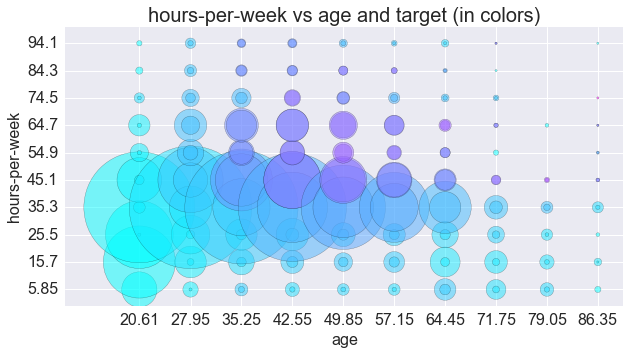

In [52]:
bubble_plot(df, x='age', y='hours-per-week', z_boolean='target', maximal_bubble_size=15000)

# impute missing values for categorical columns with the most common values

In [53]:
df = pd.read_csv("adult.csv").drop('Unnamed: 0',axis=1)

categorical_columns = [x for x in df.columns if x not in numerical_columns and x!='target']

for col in categorical_columns:
    df.loc[df[col]==' ?',col] = df[col].value_counts().index.values[0]

# Remove infrequent categorical values

In [54]:
infrequent_cols_to_remove = []
for cat_col in categorical_columns:
    col_count = df[cat_col].value_counts()
    infrequent_values = col_count[col_count<20].index.values
    if not col_count[col_count<20].empty:
        print("removing columns: \n{} \n".format(col_count[col_count<20]))
    infrequent_cols_to_remove += ["{}_{}".format(cat_col, x) for x in infrequent_values]

removing columns: 
 Without-pay     14
 Never-worked     7
Name: workclass, dtype: int64 

removing columns: 
 Armed-Forces    9
Name: occupation, dtype: int64 

removing columns: 
 Trinadad&Tobago               19
 Cambodia                      19
 Laos                          18
 Thailand                      18
 Yugoslavia                    16
 Outlying-US(Guam-USVI-etc)    14
 Honduras                      13
 Hungary                       13
 Scotland                      12
 Holand-Netherlands             1
Name: native-country, dtype: int64 



# Convert categorical variables to dummy variables

In [55]:
from sklearn.cross_validation import StratifiedKFold
df = pd.read_csv("adult.csv").drop('Unnamed: 0',axis=1)
y = df.target==">50K"
features = [x for x in df.columns if x!='target']
X = pd.get_dummies(df[features])

# Split to train and test data

In [56]:
kf = StratifiedKFold(y, 5, random_state=12345, shuffle=True)
train_index, test_index = list(kf)[0]
train, test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y[train_index], y[test_index]


In [57]:
df.target.value_counts()/len(df)

<=50K    0.75919
>50K     0.24081
Name: target, dtype: float64

In [58]:
pd.Series(y_train).value_counts()/len(y_train)

False    0.759214
True     0.240786
Name: target, dtype: float64

In [59]:
pd.Series(y_test).value_counts()/len(y_test)

False    0.759097
True     0.240903
Name: target, dtype: float64

# Check correlation between the variables and between the variables and the target

In [60]:
from matplotlib import cm as cm

def correlation_matrix(df, features=None, path_to_save_plot=None, figsize=(20, 13), fontsize=16):
    features = df.columns if features is None else features
    df = df[features]
    correlations = df.corr()
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap=cm.get_cmap('cool', 30))
    fig.colorbar(cax)
    ticks_x = np.arange(-0.1, len(features)-0.1, 1)
    ticks_y = np.arange(-0.1, len(features)-0.1, 1)
    ax.set_xticks(ticks_x)
    ax.set_yticks(ticks_y)
    ax.set_xticklabels(features, rotation='vertical', fontsize=fontsize)
    ax.set_yticklabels(features, fontsize=fontsize)
    plt.subplots_adjust(top=0.75)
    if path_to_save_plot is not None:
        plot_name = "correlation_matrix.png"
        path_to_save = "/".join([path_to_save_plot, plot_name])
        logger.info("saving figure in %s" % path_to_save)
        plt.savefig(path_to_save)
    else:
        plt.show()
X['target'] = y

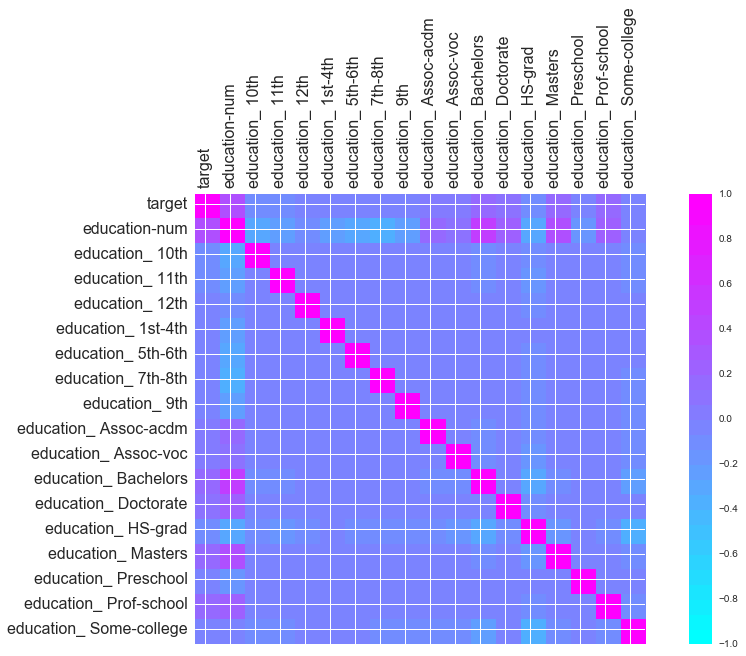

In [61]:
features2 =['target']+[x for x in X.columns if x.startswith('education') ]
correlation_matrix(X, features2, fontsize=16,  figsize=(16, 10),)

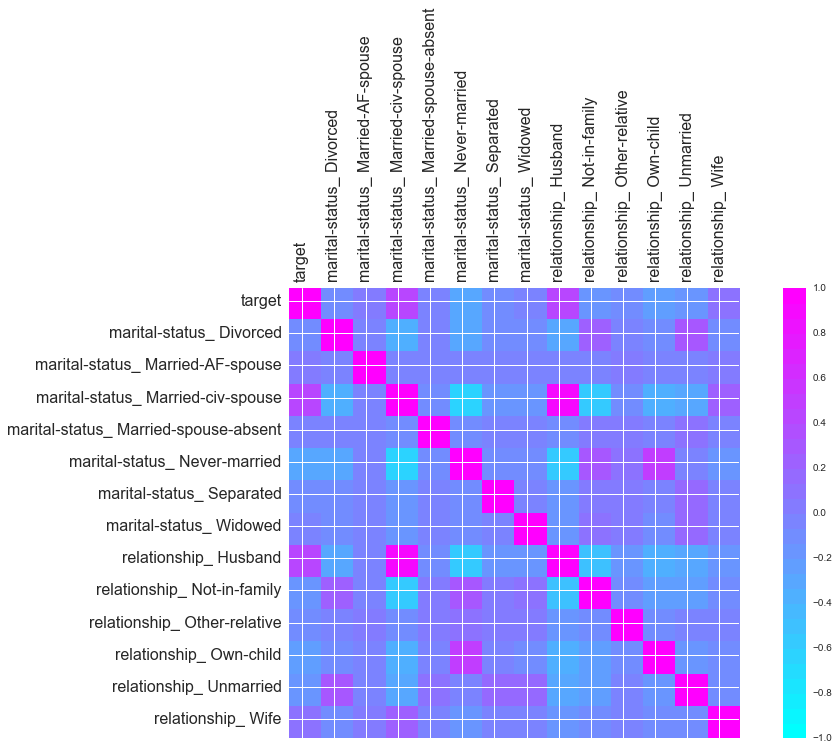

In [62]:
features2 =['target']+[x for x in X.columns if x.startswith('relationship_') or x.startswith('marital')]
correlation_matrix(X, features2, fontsize=16,  figsize=(16, 10),)

# Find features which are highly correlated

In [63]:
X['target'] = y

In [64]:
correlation_mat = X.corr()
correlation_melted = pd.melt(correlation_mat.reset_index().rename(columns={"index": "var_1"}), id_vars=("var_1"),var_name='var_2')

In [65]:
correlation_melted = correlation_melted[correlation_melted.var_1!=correlation_melted.var_2]

In [66]:
correlation_melted['var_couple'] = correlation_melted[['var_1','var_2']].apply(lambda x:tuple(sorted([x[0],x[1]])), axis=1)

In [67]:
correlation_melted = correlation_melted.drop_duplicates(subset='var_couple').drop(['var_couple'],axis=1)

In [68]:
correlation_melted['abs_value'] = correlation_melted['value'].abs().round(3)
correlation_melted.sort_values(by='abs_value').tail(10)

,var_1,var_2,value,abs_value
35,marital-status_ Never-married,age,-0.534359,0.534
3651,relationship_ Not-in-family,marital-status_ Married-civ-spouse,-0.537588,0.538
3868,relationship_ Husband,marital-status_ Never-married,-0.576730,0.577
5841,sex_ Female,relationship_ Husband,-0.580135,0.580
5842,sex_ Male,relationship_ Husband,0.580135,0.580
3632,marital-status_ Never-married,marital-status_ Married-civ-spouse,-0.644866,0.645
6712,race_ White,race_ Black,-0.788747,0.789
3650,relationship_ Husband,marital-status_ Married-civ-spouse,0.893210,0.893
692,occupation_ ?,workclass_ ?,0.997985,0.998
7041,sex_ Male,sex_ Female,-1.000000,1.000


In [69]:
highly_correlated_features = correlation_melted.sort_values(by='abs_value').tail(5).var_2.values

In [70]:
X = X.drop('target',axis=1)

# Find features which are highly correlated with the target

In [71]:
correlation_melted[(correlation_melted.var_1=='target')|(correlation_melted.var_2=='target')].sort_values(by='abs_value').tail(10)

,var_1,var_2,value,abs_value
7193,target,sex_ Male,0.215980,0.216
7084,target,sex_ Female,-0.215980,0.216
435,target,capital-gain,0.223329,0.223
6212,target,relationship_ Own-child,-0.228532,0.229
653,target,hours-per-week,0.229689,0.230
108,target,age,0.234037,0.234
3923,target,marital-status_ Never-married,-0.318440,0.318
326,target,education-num,0.335154,0.335
5885,target,relationship_ Husband,0.401035,0.401
3705,target,marital-status_ Married-civ-spouse,0.444696,0.445


In [72]:
target_corr = correlation_melted[(correlation_melted.var_1=='target')|(correlation_melted.var_2=='target')].sort_values(by='abs_value')
best_features_by_correlation = target_corr[target_corr.abs_value>0.03].var_2.values

In [73]:
len(best_features_by_correlation)

51

# Train a Logistic regression model and evaluate its results

             precision    recall  f1-score   support

      False       0.79      0.60      0.69      4944
       True       0.29      0.50      0.37      1569

avg / total       0.67      0.58      0.61      6513



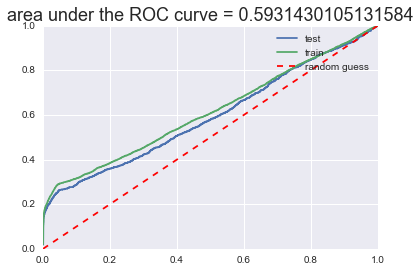

In [74]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

def find_best_threshold(thresholds, fpr, tpr):
    """
    find the best threshold from the roc curve. by finding the threshold for the point which is closest to (fpr=0,tpr=1)
    """
    fpr_tpr = pd.DataFrame({'thresholds': thresholds, 'fpr': fpr, 'tpr': tpr})
    fpr_tpr['dist'] = (fpr_tpr['fpr'])**2 + (fpr_tpr['tpr']-1)**2
    return fpr_tpr.ix[fpr_tpr.dist.idxmin(), 'thresholds']



def get_model_results(model, train, test, y_train, y_test):
    probabilities = model.predict_proba(test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    threshold = find_best_threshold(thresholds, fpr, tpr)
    predictions = probabilities>threshold
    plt.figure()
    plt.plot(fpr, tpr, label='test')
    roc_auc = roc_auc_score(y_test, probabilities)
    probabilities = model.predict_proba(train)[:,1]
    fpr, tpr, thresholds = roc_curve(y_train, probabilities)
    plt.plot(fpr, tpr, label='train')
    plt.plot([0, 1], [0, 1], 'r--', label='random guess')
    plt.title("area under the ROC curve = {}".format(roc_auc), fontsize=18);
    print(classification_report(y_test, predictions))
    plt.legend()

model = make_pipeline(LogisticRegression())
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# Logistic regression with normalization

             precision    recall  f1-score   support

      False       0.94      0.81      0.87      4944
       True       0.59      0.84      0.69      1569

avg / total       0.85      0.82      0.83      6513



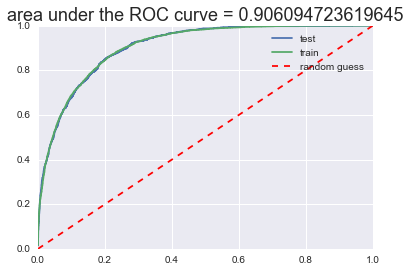

In [75]:
model = make_pipeline(MinMaxScaler(),LogisticRegression())
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# Logistic regression with Polynomial features

In [76]:
poly = PolynomialFeatures(2)
train_poly_features = poly.fit_transform(train[numerical_columns])
test_poly_features = poly.transform(test[numerical_columns])
train_with_poly_features = pd.concat([train.reset_index(drop=True),pd.DataFrame(train_poly_features)],axis=1)
test_with_poly_features = pd.concat([test.reset_index(drop=True),pd.DataFrame(test_poly_features)],axis=1)

             precision    recall  f1-score   support

      False       0.94      0.82      0.87      4944
       True       0.59      0.84      0.70      1569

avg / total       0.86      0.82      0.83      6513



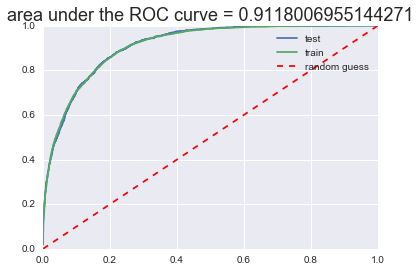

In [77]:
model = make_pipeline(MinMaxScaler(),LogisticRegression())
model.fit(train_with_poly_features, y_train)
get_model_results(model, train_with_poly_features, test_with_poly_features, y_train, y_test)

/Users/shirmeir/.virtualenvs/risk3/lib/python3.4/site-packages/pandas/tools/plotting.py:927: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


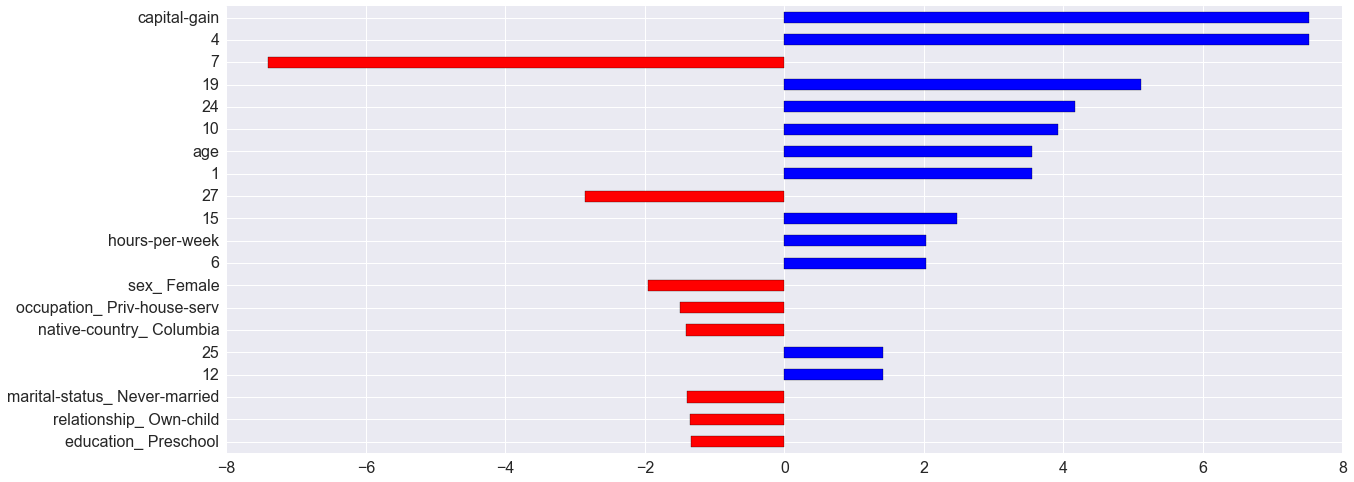

In [78]:
logistic_coef = model.steps[1][1].coef_[0]
feature_importance = pd.DataFrame(index=train_with_poly_features.columns, data={'coef':logistic_coef})
feature_importance['abs_value'] = feature_importance.abs()
strong_features = feature_importance.sort_values(by='abs_value')['coef'].tail(20)
strong_features.plot.barh(figsize=(20,8) , fontsize=16, colors=['r' if x<0 else 'b' for x in strong_features]);

             precision    recall  f1-score   support

      False       0.95      0.80      0.87      4944
       True       0.58      0.86      0.69      1569

avg / total       0.86      0.81      0.82      6513



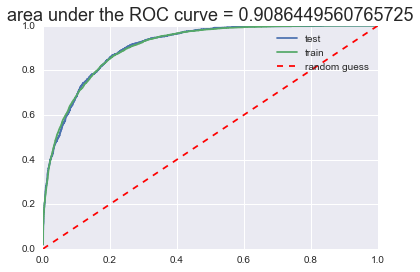

In [79]:
best_features = feature_importance.sort_values(by='abs_value')['coef'].tail(50).index.values
model = make_pipeline(MinMaxScaler(),LogisticRegression())
model.fit(train_with_poly_features[best_features], y_train)
get_model_results(model, train_with_poly_features[best_features], test_with_poly_features[best_features], y_train, y_test)

# XGBoost with polynomial features

             precision    recall  f1-score   support

      False       0.95      0.83      0.88      4944
       True       0.61      0.85      0.71      1569

avg / total       0.87      0.83      0.84      6513



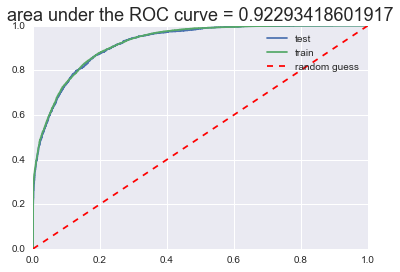

In [80]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train_with_poly_features, y_train)
get_model_results(model, train_with_poly_features, test_with_poly_features, y_train, y_test)

# Hyper-parameter tuning for logistic regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
params = {'logisticregression__penalty': ['l2','l1'], 'logisticregression__C': [1, 10, 100, 1000],
#           'logisticregression__penalty': ['l1'], 'logisticregression__C': [1,],
#                  'solver': ['newton-cg'],
                 'logisticregression__fit_intercept': [False, True]
         }
gscv = GridSearchCV(make_pipeline(MinMaxScaler(), LogisticRegression()), params, scoring='roc_auc', cv=3)
gscv.fit(train, y_train)
get_model_results(gscv, train, test, y_train, y_test)
print(gscv.best_params_)

# Random forest classifier

             precision    recall  f1-score   support

      False       0.92      0.81      0.86      4944
       True       0.57      0.78      0.66      1569

avg / total       0.83      0.80      0.81      6513



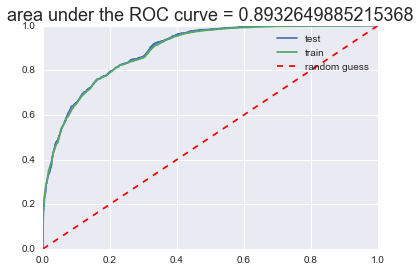

In [82]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=3, n_estimators=100) # max_depth=4
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# plot one the random forest trees

In [83]:
from sklearn import tree
from os import system

tree_dot_path = "models/tree1.dot"
tree_png_path = "models/tree1.png"
dotfile = open(tree_dot_path, 'w')
tree.export_graphviz(model.estimators_[10], out_file = dotfile, 
                     feature_names = train.columns, 
                     filled=True)
dotfile.close()
system("dot -Tpng {tree_dot_path} -o {tree_png_path}".format(
        tree_dot_path=tree_dot_path, tree_png_path=tree_png_path));

<img src=models/tree1.png width="1700">

# XGBoost

             precision    recall  f1-score   support

      False       0.95      0.82      0.88      4944
       True       0.60      0.86      0.71      1569

avg / total       0.86      0.83      0.84      6513



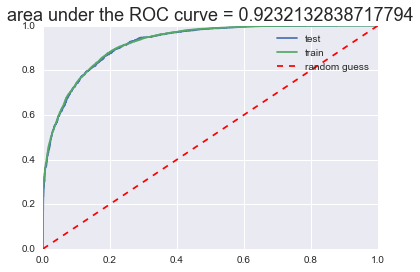

In [84]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# Feature importnace for xgboost

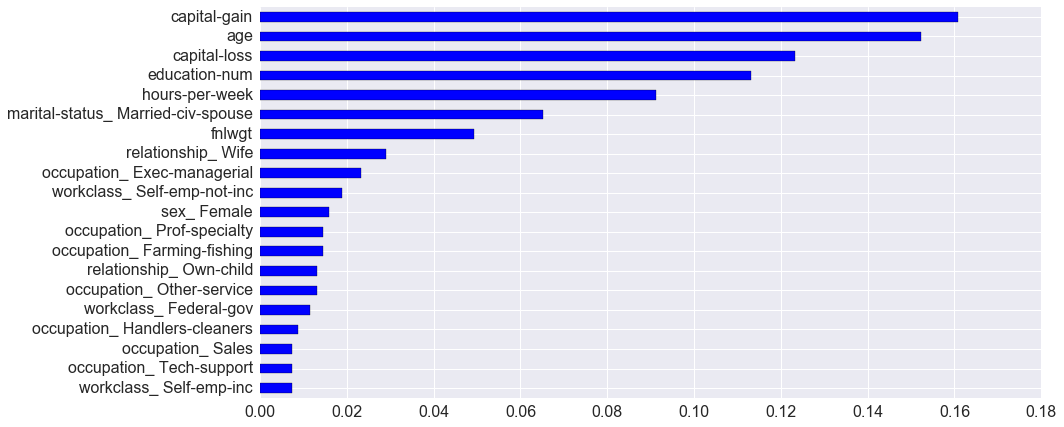

In [85]:
import xgboost as xgb
feature_importance = pd.Series(index=train.columns , data= model.feature_importances_)
feature_importance = feature_importance.sort_values()
feature_importance.tail(20).plot.barh(fontsize=16, figsize=(14,7))

# XGBoost classifier with the 15 strongest features

             precision    recall  f1-score   support

      False       0.95      0.83      0.88      4944
       True       0.61      0.85      0.71      1569

avg / total       0.87      0.84      0.84      6513



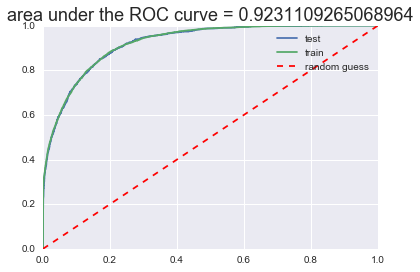

In [86]:
best_features = feature_importance.tail(15).index.values
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train[best_features].rename(columns={x:x.replace(" ","") for x in best_features}), y_train)

get_model_results(model, train[best_features].rename(columns={x:x.replace(" ","") for x in best_features}),  test[best_features].rename(columns={x:x.replace(" ","") for x in best_features}), y_train, y_test)

# plot one of the xgboost trees

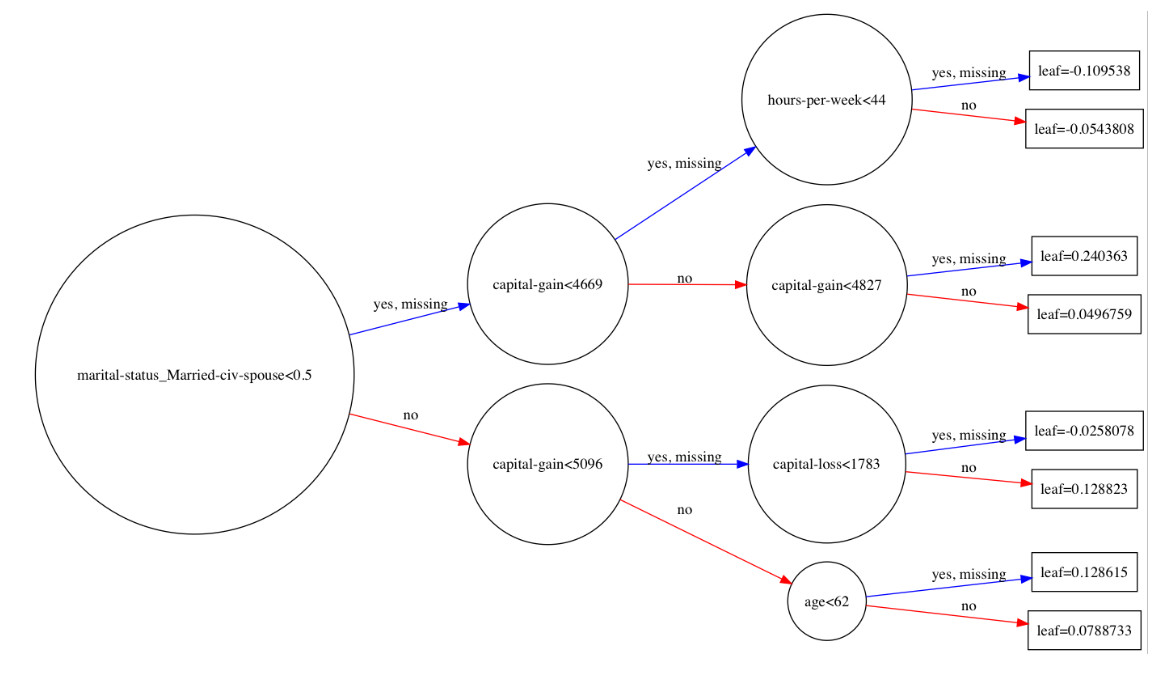

In [87]:
import matplotlib
from xgboost import plot_tree
from matplotlib.pylab import rcParams
ax = plot_tree(model,num_trees=10, rankdir='LR')
fig = ax.figure
fig.set_size_inches(20, 20)


# Try encoding the categorical variables based on conditional distribution P(y=1 / x=xi)

             precision    recall  f1-score   support

      False       0.95      0.83      0.88      4944
       True       0.61      0.86      0.72      1569

avg / total       0.87      0.84      0.84      6513



/Users/shirmeir/.virtualenvs/risk3/lib/python3.4/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


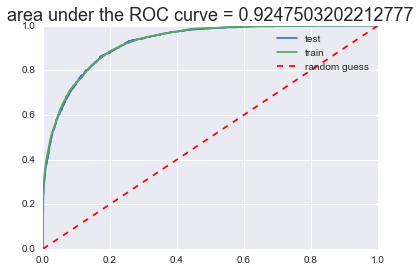

In [88]:
df = pd.read_csv("adult.csv").drop('Unnamed: 0',axis=1)
categorical_columns = [x for x in df.columns if x not in numerical_columns and x!='target']
columns_to_encode_with_frequencies=categorical_columns#['native-country']
for col in categorical_columns:
    df.loc[df[col]==' ?',col] = df[col].value_counts().index.values[0]
X = df[features]
kf = StratifiedKFold(y, 5, random_state=12345, shuffle=True)
train_index, test_index = list(kf)[0]
train, test = df.iloc[train_index], df.iloc[test_index]
y_train, y_test = y[train_index], y[test_index]
for col in columns_to_encode_with_frequencies:
    country_by_target = train.groupby(col)['target'].value_counts().unstack().fillna(0)
    country_probability = country_by_target['>50K']/country_by_target.sum(axis=1)
    df[col] = df[col].map(country_probability)
X = pd.get_dummies(df[features])
train, test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y[train_index], y[test_index]

from xgboost import XGBClassifier
model = XGBClassifier()

model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)


             precision    recall  f1-score   support

      False       0.95      0.81      0.87      4944
       True       0.58      0.86      0.69      1569

avg / total       0.86      0.82      0.83      6513



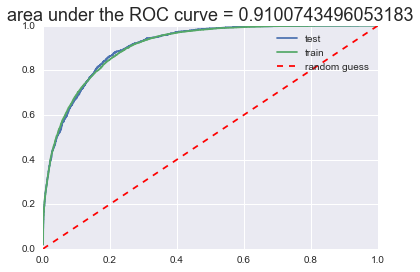

In [89]:
model = make_pipeline(PolynomialFeatures(2), MinMaxScaler(),LogisticRegression())
# model = make_pipeline(MinMaxScaler(),LogisticRegression())
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

In [90]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,0.266667,77516,0.414874,13,0.045866,0.132717,0.103474,0.255884,0.304985,2174,0,40,0.245903
1,50,0.284593,83311,0.414874,13,0.445389,0.485608,0.447525,0.255884,0.304985,0,0,13,0.245903
2,38,0.209558,215646,0.160104,9,0.107928,0.058413,0.103474,0.255884,0.304985,0,0,40,0.245903
3,53,0.209558,234721,0.049788,7,0.445389,0.058413,0.447525,0.121638,0.304985,0,0,40,0.245903
4,28,0.209558,338409,0.414874,13,0.445389,0.341990,0.473768,0.121638,0.109971,0,0,40,0.242857
